In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
def heatfd(xl,xr,yb,yt,M,N):
    f = lambda x: np.sin(2*np.pi*x)**2
    l = lambda t: 0*t
    r = lambda t: 0*t
    D = 1
    h = (xr-xl)/M
    k = (yt-yb)/N
    m = M-1
    n = N

    sigma = D*k/(h**2)
    a = np.diag(1-2*sigma*np.ones(m)) + np.diag(sigma*np.ones(m-1),1) + np.diag(sigma*np.ones(m-1),-1)
    lside = l(yb + np.arange(n + 1) * k)
    rside = r(yb + np.arange(n + 1) * k)
    w = np.zeros((m,n+1))
    w[:,0] = f(xl + np.arange(m) * h)
    for j in range(1,n):
        w[:,j+1] = a*w[:,j] + sigma*np.hstack([lside[j],np.zeros(m-2),rside[j]])
    w = np.vstack([lside,w,rside])
    t = np.arange(n+1)*k
    x = np.arange(m+2)*h
    return w,x,t

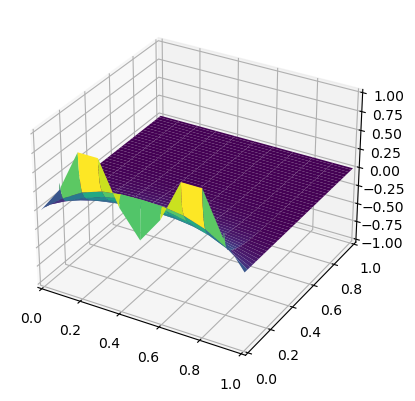

In [8]:
def heatfd(xl, xr, yb, yt, M, N):
    # Define the heat source function
    def f(x):
        return np.sin(2 * np.pi * x) ** 2

    # Define the boundary conditions
    def l(t):
        return 0 * t

    def r(t):
        return 0 * t

    D = 1
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N  # Corrected from n = n
    sigma = D * k / (h ** 2)
    a = np.diag(1 - 2 * sigma * np.ones(m)) + np.diag(sigma * np.ones(m - 1), 1) + np.diag(sigma * np.ones(m - 1), -1)
    lside = l(yb + np.arange(n + 1) * k)
    rside = r(yb + np.arange(n + 1) * k)
    w = np.zeros((m, n + 1))
    x = xl + np.arange(1, m + 1) * h
    w[:, 0] = f(x)
    for j in range(n):
        w[:, j + 1] = np.dot(a, w[:, j]) + sigma * np.hstack((lside[j], np.zeros(m - 2), rside[j]))
    w = np.vstack((lside, w, rside))
    x = np.linspace(xl, xr, m + 2)
    t = np.linspace(yb, yt, n + 1)
    X, T = np.meshgrid(x, t)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, T, w.T, cmap='viridis')
    
    #ax.view_init(azim=60, elev=30)
    ax.set_xlim(xl, xr)
    ax.set_ylim(yb, yt)
    ax.set_zlim(-1, 1)
    
    plt.show()

# Example usage
heatfd(0, 1, 0, 1, 10, 250)


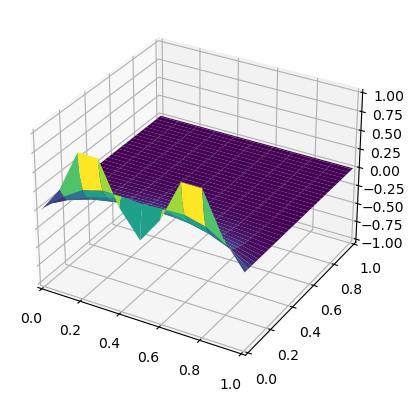

In [11]:
def heatbd(xl, xr, yb, yt, M, N):
    # Define the heat source function
    def f(x):
        return np.sin(2 * np.pi * x) ** 2

    # Define the boundary conditions
    def l(t):
        return 0 * t

    def r(t):
        return 0 * t

    D = 1
    h = (xr - xl) / M
    k = (yt - yb) / N
    m = M - 1
    n = N
    sigma = D * k / (h ** 2)
    a = np.diag(1 + 2 * sigma * np.ones(m)) + np.diag(-sigma * np.ones(m - 1), 1) + np.diag(-sigma * np.ones(m - 1), -1)
    lside = l(yb + np.arange(n + 1) * k)
    rside = r(yb + np.arange(n + 1) * k)
    w = np.zeros((m, n + 1))
    x = xl + np.arange(1, m + 1) * h
    w[:, 0] = f(x)
    for j in range(n):
        w[:, j + 1] = np.linalg.solve(a, w[:, j] + sigma * np.hstack((lside[j], np.zeros(m - 2), rside[j])))

    w = np.vstack((lside, w, rside))
    x = np.linspace(xl, xr, m + 2)
    t = np.linspace(yb, yt, n + 1)
    X, T = np.meshgrid(x, t)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, T, w.T, cmap='viridis')

    #ax.view_init(azim=60, elev=30)
    ax.set_xlim(xl, xr)
    ax.set_ylim(yb, yt)
    ax.set_zlim(-1, 1)

    plt.show()

# Example usage
heatbd(0, 1, 0, 1, 10, 100)
